In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print(features)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

        RM  LSTAT  PTRATIO
0    6.575   4.98     15.3
1    6.421   9.14     17.8
2    7.185   4.03     17.8
3    6.998   2.94     18.7
4    7.147   5.33     18.7
..     ...    ...      ...
484  6.593   9.67     21.0
485  6.120   9.08     21.0
486  6.976   5.64     21.0
487  6.794   6.48     21.0
488  6.030   7.88     21.0

[489 rows x 3 columns]
Boston housing dataset has 489 data points with 4 variables each.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X_train, X_valid, y_train, y_valid = train_test_split(features,prices, train_size=0.8, test_size=0.2,
                                                      random_state=0)
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
def get_score(max_leaf_nodes,train_x,val_x,train_y,val_y):
  model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
  model.fit(train_x,train_y)
  predict_val=model.predict(val_x)
  score=mean_absolute_error(val_y,predict_val)
  return score


In [ ]:
for max_leaf_nodes in [5,50,60,100,200,500]:
  score=get_score(max_leaf_nodes,imputed_X_train,imputed_X_valid,y_train,y_valid)
  print("Max leaf nodes: %d \t\t Score: %d"%(max_leaf_nodes,score))

Max leaf nodes: 5 		 Score: 68884
Max leaf nodes: 50 		 Score: 61469
Max leaf nodes: 60 		 Score: 63867
Max leaf nodes: 100 		 Score: 71401
Max leaf nodes: 200 		 Score: 75075
Max leaf nodes: 500 		 Score: 76714


In [ ]:
max_leaf_nodes=50
model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
model.fit(imputed_X_train,y_train)
predict_val=model.predict(imputed_X_valid)
print(predict_val)


[428621.05263158 577800.         324240.         246900.
 495950.         246900.         324240.         423658.06451613
 423658.06451613 423658.06451613 246900.         314565.51724138
 428621.05263158 168450.         545434.61538462 301875.
 423658.06451613 648900.         411000.         648900.
 644700.         779800.         289800.         428621.05263158
 411000.         918750.         716100.         918750.
 423658.06451613 423658.06451613 487200.         411000.
 423658.06451613 686127.27272727 423658.06451613 789600.
 495950.         189466.66666667 495950.         495950.
 246900.         324240.         423658.06451613 495950.
 346500.         369600.         495950.         314565.51724138
 919800.         423658.06451613 686127.27272727 423658.06451613
 545434.61538462 314565.51724138 716100.         545434.61538462
 369600.         333900.         760200.         428621.05263158
 321825.         246900.         411000.         411000.
 423658.06451613 411000.        

In [ ]:
score=mean_absolute_error(y_valid,predict_val)
print("score:{}".format(score))

score:61469.13968836063


LOGISTIC REGRESSION


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(imputed_X_train,y_train)
model.predict_proba(imputed_X_valid)


array([[7.98589449e-04, 3.00669328e-04, 1.35917291e-04, ...,
        1.59639795e-04, 6.68303792e-05, 1.69207814e-05],
       [9.87537908e-04, 1.32695078e-03, 8.44345877e-04, ...,
        3.29107282e-03, 5.99017644e-03, 1.90356284e-02],
       [1.81604264e-02, 1.46114057e-02, 1.89154427e-02, ...,
        7.46320726e-10, 8.59522179e-09, 5.50881137e-05],
       ...,
       [6.05517441e-04, 3.38312186e-04, 1.57840029e-04, ...,
        1.50573243e-03, 7.83337947e-04, 1.87284215e-04],
       [9.26172248e-04, 3.77982232e-04, 1.74732335e-04, ...,
        1.52481896e-04, 7.46429549e-05, 2.77416474e-05],
       [5.60991838e-04, 4.39928435e-04, 2.18684388e-04, ...,
        4.16754254e-03, 3.07345267e-03, 1.24205731e-03]])

In [ ]:
model.predict(imputed_X_valid)

array([ 432600.,  499800.,  327600.,  373800.,  462000.,  373800.,
        289800.,  485100.,  462000.,  485100.,  373800.,  485100.,
        432600.,  289800.,  432600.,  485100.,  462000.,  462000.,
        405300.,  525000.,  644700.,  525000.,  289800.,  432600.,
        485100.,  732900., 1024800.,  732900.,  485100.,  485100.,
        373800.,  373800.,  485100.,  732900.,  462000.,  732900.,
        462000.,  289800.,  462000.,  525000.,  373800.,  327600.,
        485100.,  525000.,  289800.,  485100.,  462000.,  405300.,
        732900.,  485100.,  732900.,  485100.,  525000.,  405300.,
        525000.,  525000.,  485100.,  373800.,  462000.,  432600.,
        327600.,  373800.,  373800.,  373800.,  485100.,  373800.,
        289800.,  525000.,  462000.,  373800.,  289800.,  525000.,
        485100.,  525000.,  373800.,  485100.,  499800.,  373800.,
        525000.,  485100.,  485100.,  732900.,  485100.,  462000.,
        373800.,  462000.,  525000.,  525000.,  485100.,  3276

In [ ]:
confusion_matrix(y,model.predict(imputed_X_valid))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

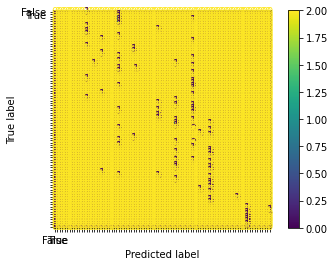

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y, model.predict(imputed_X_valid))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3) 
k_means.fit(imputed_X_train,y_train)
k_means.predict(imputed_X_valid,y_valid)


array([1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1,
       2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 1, 1, 1, 1], dtype=int32)